In [315]:
import warnings
warnings.filterwarnings('ignore') 

In [339]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [317]:
Country_df = pd.read_csv("Country-data.csv", sep=",", encoding="ISO-8859-1", header=0)
Country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [318]:
Country_df.shape

(167, 10)

In [319]:
Country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 12.5+ KB


In [320]:
# missing values
round(100*(Country_df.isnull().sum())/len(Country_df), 2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

In [321]:
# duplicates
Country_df.duplicated(subset = ['country'], keep = False).sum()
#sum(Country_df.duplicated(subset = 'country'))==0

0

In [322]:
# for spelling mistakes
print(Country_df['country'].unique())

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada'
 'Cape Verde' 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Comoros' 'Congo, Dem. Rep.' 'Congo, Rep.' 'Costa Rica' "Cote d'Ivoire"
 'Croatia' 'Cyprus' 'Czech Republic' 'Denmark' 'Dominican Republic'
 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia'
 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana'
 'Greece' 'Grenada' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti'
 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel'
 'Italy' 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan' 'Kenya' 'Kiribati'
 'Kuwait' 'Kyrgyz Republic' 'Lao' 'Latvia' 'Lebanon' 'Lesotho' 'Liberia'
 '

###  lowest 10 countries

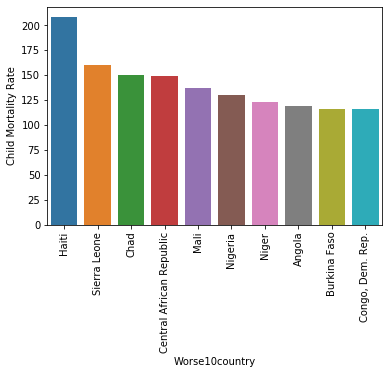

In [323]:
# Child Mortality Rate

Worse10= Country_df[['country','child_mort']].sort_values('child_mort', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='child_mort', data= Worse10)
plt1.set(xlabel = 'Worse10country', ylabel= 'Child Mortality Rate')
plt.xticks(rotation = 90)
plt.show()

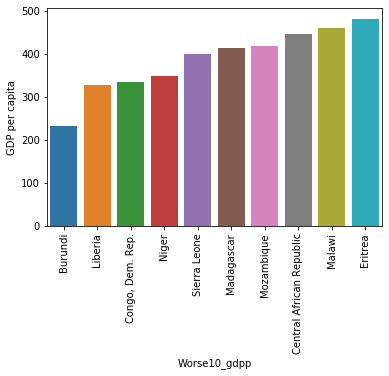

In [324]:
# The GDP per capita 

Worse10_gdpp = Country_df[['country','gdpp']].sort_values('gdpp', ascending = True).head(10)
plt2 = sns.barplot(x='country', y='gdpp', data= Worse10_gdpp)
plt2.set(xlabel = 'Worse10_gdpp', ylabel= 'GDP per capita')
plt.xticks(rotation = 90)
plt.show()

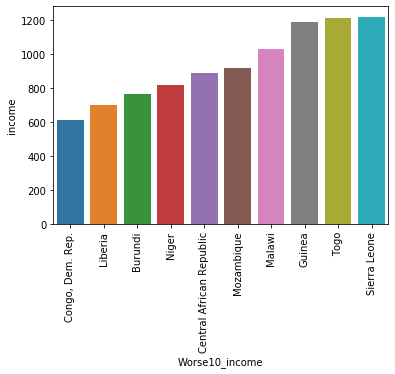

In [325]:
# income

Worse10_income = Country_df[['country','income']].sort_values('income', ascending = True).head(10)
plt3 = sns.barplot(x='country', y='income', data= Worse10_income)
plt3.set(xlabel = 'Worse10_income', ylabel= 'income')
plt.xticks(rotation = 90)
plt.show()


#### similar percentange but their gdpp with huge gap doesn't give an accurate idea of which country is more developed so convert imports,exports and health spending from percentage values to actual values 


In [326]:
Country_df['exports'] = Country_df['exports']*Country_df['gdpp']/100
Country_df['imports'] = Country_df['imports']*Country_df['gdpp']/100
Country_df['health'] = Country_df['health']*Country_df['gdpp']/100
Country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


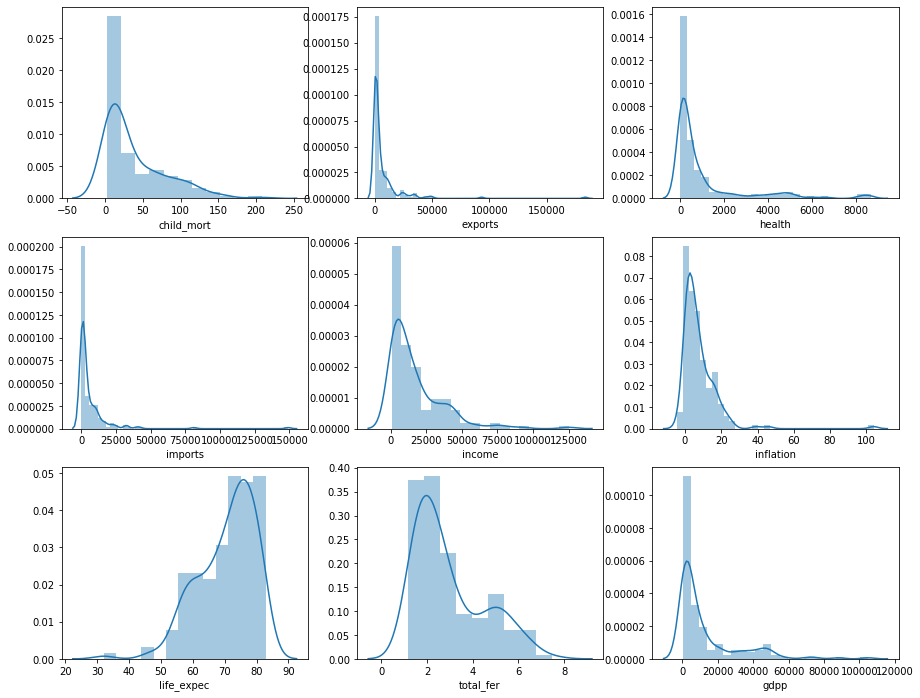

In [327]:
# Cheking the outliers 
fig, axs = plt.subplots(3,3, figsize = (15,12))

plt_1 = sns.distplot(Country_df['child_mort'], ax = axs[0,0])
plt_2 = sns.distplot(Country_df['exports'], ax = axs[0,1])
plt_3 = sns.distplot(Country_df['health'], ax = axs[0,2])
plt_4 = sns.distplot(Country_df['imports'], ax = axs[1,0])
plt_5 = sns.distplot(Country_df['income'], ax = axs[1,1])
plt_6 = sns.distplot(Country_df['inflation'], ax = axs[1,2])
plt_7 = sns.distplot(Country_df['life_expec'], ax = axs[2,0])
plt_8 = sns.distplot(Country_df['total_fer'], ax = axs[2,1])
plt_9 = sns.distplot(Country_df['gdpp'], ax = axs[2,2])

plt.show()

### only life_expec comes out to be right skewed

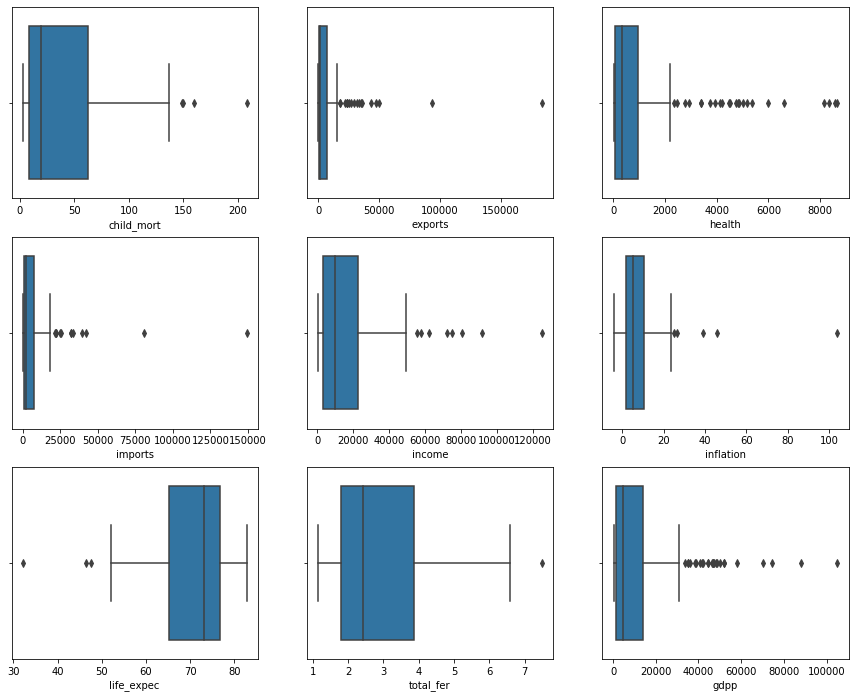

In [328]:
# Checking the outliers 
fig, axs = plt.subplots(3,3, figsize = (15,12))

plt1 = sns.boxplot(Country_df['child_mort'], ax = axs[0,0])
plt2 = sns.boxplot(Country_df['exports'], ax = axs[0,1])
plt3 = sns.boxplot(Country_df['health'], ax = axs[0,2])
plt4 = sns.boxplot(Country_df['imports'], ax = axs[1,0])
plt5 = sns.boxplot(Country_df['income'], ax = axs[1,1])
plt6 = sns.boxplot(Country_df['inflation'], ax = axs[1,2])
plt7 = sns.boxplot(Country_df['life_expec'], ax = axs[2,0])
plt8 = sns.boxplot(Country_df['total_fer'], ax = axs[2,1])
plt9 = sns.boxplot(Country_df['gdpp'], ax = axs[2,2])

plt.show()

In [329]:
#  for upper caping
# for High Child mortality and higher inflation uppercapping should not be done
# for export, health, imports, total_fer and gdpp : upper capping (0.99 percentile)

cols = ['exports', 'health', 'imports', 'total_fer','gdpp']
Country_df[cols].describe(percentiles= [0.01,0.25,0.5,0.75,0.99])

,exports,health,imports,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000
mean,7420.618847,1056.733204,6588.352108,2.947964,12964.155689
std,17973.885795,1801.408906,14710.810418,1.513848,18328.704809
min,1.076920,12.821200,0.651092,1.150000,231.000000
1%,22.243716,17.009362,104.909640,1.243200,331.620000
25%,447.140000,78.535500,640.215000,1.795000,1330.000000
50%,1777.440000,321.886000,2045.580000,2.410000,4660.000000
75%,7278.000000,976.940000,7719.600000,3.880000,14050.000000
99%,64794.260000,8410.330400,55371.390000,6.563600,79088.000000
max,183750.000000,8663.600000,149100.000000,7.490000,105000.000000


In [330]:
#Checking for outliers

Country_df.describe(percentiles= [0.01,0.25,0.5,0.75,0.99])


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
1%,2.800000,22.243716,17.009362,104.909640,742.240000,-2.348800,47.160000,1.243200,331.620000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
99%,153.400000,64794.260000,8410.330400,55371.390000,84374.000000,41.478000,82.370000,6.563600,79088.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [331]:
#cols = ['exports', 'health', 'imports', 'total_fer','gdpp']

Q1 = Country_df.gdpp.quantile(0.01)
Q3 = Country_df.gdpp.quantile(0.99)
#IQR = Q3-Q1
country_data = Country_df[(Country_df.gdpp <= Q3)]

Q1 = Country_df.gdpp.quantile(0.01)
Q3 = Country_df.gdpp.quantile(0.99)
#IQR = Q3-Q1
country_data = Country_df[(Country_df.exports <= Q3)]

Q1 = Country_df.gdpp.quantile(0.01)
Q3 = Country_df.gdpp.quantile(0.99)
#IQR = Q3-Q1
country_data = Country_df[(Country_df.health <= Q3)]

Q1 = Country_df.gdpp.quantile(0.01)
Q3 = Country_df.gdpp.quantile(0.99)
#IQR = Q3-Q1
country_data = Country_df[(Country_df.imports <= Q3)]

Q1 = Country_df.gdpp.quantile(0.01)
Q3 = Country_df.gdpp.quantile(0.99)
#IQR = Q3-Q1
country_data = Country_df[(Country_df.total_fer <= Q3)]

In [332]:
country_data.describe(percentiles= [0.01,0.25,0.5,0.75,0.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
1%,2.800000,22.243716,17.009362,104.909640,742.240000,-2.348800,47.160000,1.243200,331.620000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
99%,153.400000,64794.260000,8410.330400,55371.390000,84374.000000,41.478000,82.370000,6.563600,79088.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [333]:
country_data.shape


(167, 10)

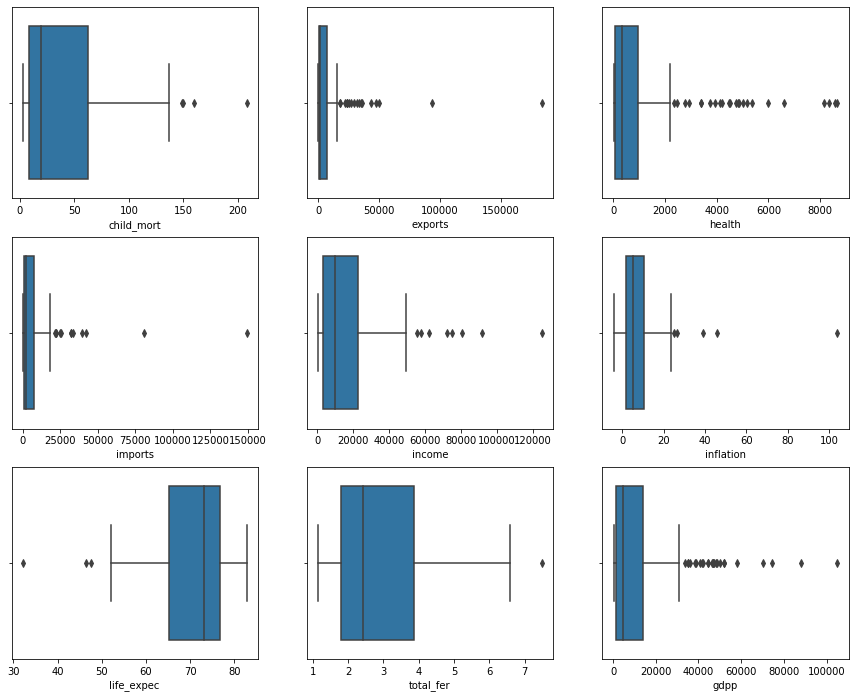

In [334]:
# Checking the outliers 
fig, axs = plt.subplots(3,3, figsize = (15,12))

plt1 = sns.boxplot(country_data['child_mort'], ax = axs[0,0])
plt2 = sns.boxplot(country_data['exports'], ax = axs[0,1])
plt3 = sns.boxplot(country_data['health'], ax = axs[0,2])
plt4 = sns.boxplot(country_data['imports'], ax = axs[1,0])
plt5 = sns.boxplot(country_data['income'], ax = axs[1,1])
plt6 = sns.boxplot(country_data['inflation'], ax = axs[1,2])
plt7 = sns.boxplot(country_data['life_expec'], ax = axs[2,0])
plt8 = sns.boxplot(country_data['total_fer'], ax = axs[2,1])
plt9 = sns.boxplot(country_data['gdpp'], ax = axs[2,2])

plt.show()

### outliers should not be removed here as this might lead to loss in country details which are in need of aid 
### after caping There are still some outliers exists but, here choosing to keep them 

### Visualising the Data

<Figure size 288x288 with 0 Axes>

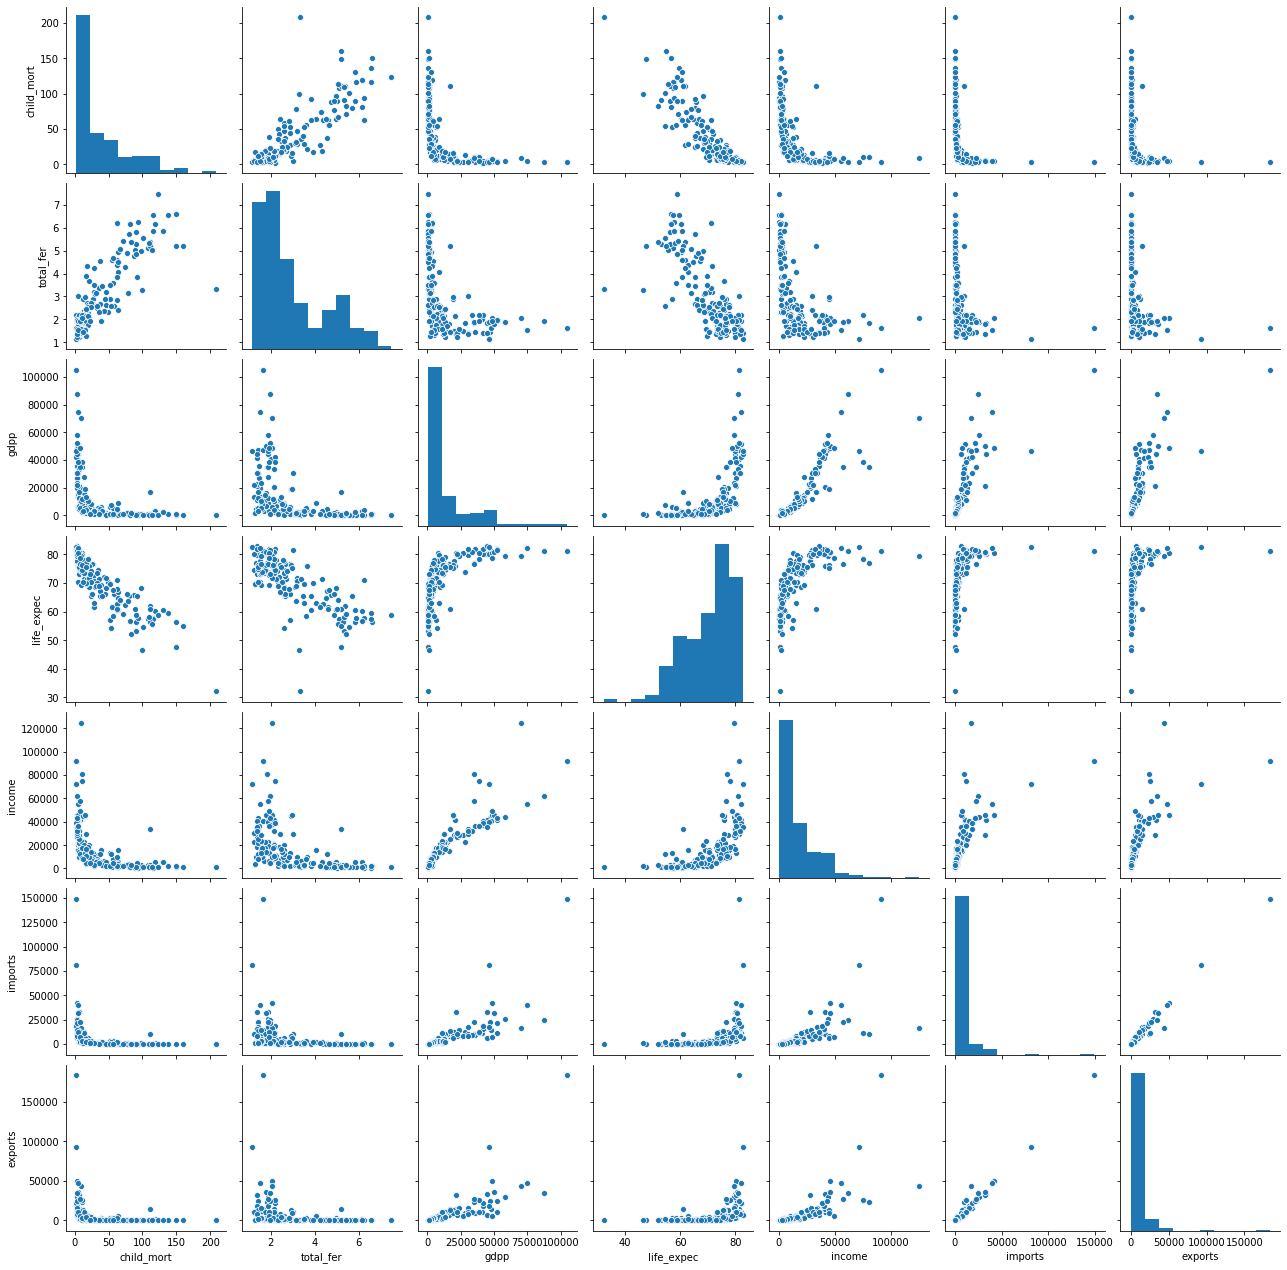

In [398]:
plt.figure(figsize = (4,4))
sns.pairplot(country_data, vars=["child_mort", 'total_fer','gdpp','life_expec','income', 'imports', 'exports'], kind='scatter')
plt.show()

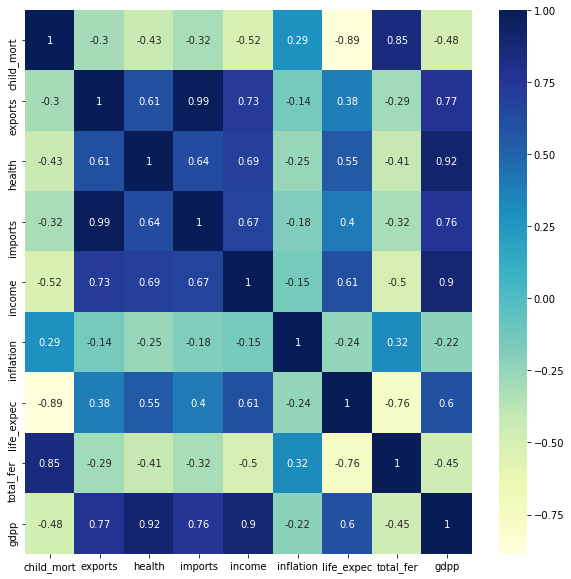

In [336]:
plt.figure(figsize = (10,10))        
sns.heatmap(country_data.corr(),annot = True , cmap="YlGnBu")

#### Child mortality with total fertility is highly correlated with the correlation coefficient of 0.85
#### Life expectency has strong negative correlation of about -0.76

In [341]:
data=country_data.drop(['country'],axis=1)
data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


###  Feature Scaling

In [304]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
data_df = standard_scaler.fit_transform(data)
data_df.shape

(167, 9)

In [305]:
data_df = pd.DataFrame(data_df)
data_df.columns = ['child_mort', 'exports', 'health', 'imports', 'income','inflation','life_expec','total_fer','gdpp']
data_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.411011,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.350191,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.318526,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,-0.291375,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.041817


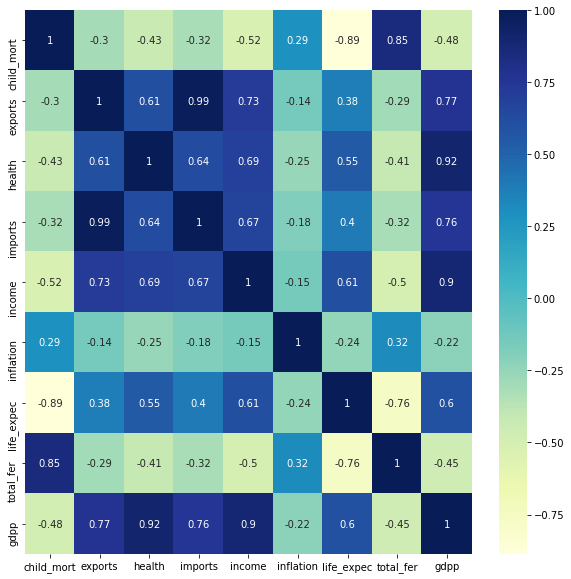

In [306]:
plt.figure(figsize = (10,10))        
sns.heatmap(data_df.corr(),annot = True , cmap="YlGnBu")

###  Let's proceed to calculating the Hopkins statistic to ensure that the data is good for clustering.

In [302]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [350]:
hopkins(data_df)


0.8915228545192495

#### If the value is between >0.7 it has a high tendency to cluster.

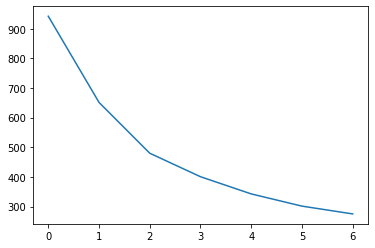

In [351]:
# Finding the Optimal Number of Clusters
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(data_df)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

In [352]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(data_df)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(data_df, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.45863306035476264
For n_clusters=3, the silhouette score is 0.4218615812599681
For n_clusters=4, the silhouette score is 0.42673357397704514
For n_clusters=5, the silhouette score is 0.43347478209451806
For n_clusters=6, the silhouette score is 0.38093072154797086
For n_clusters=7, the silhouette score is 0.29863984049315306
For n_clusters=8, the silhouette score is 0.3028353497426958


In [357]:
# final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(data_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [358]:
kmeans.labels_

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 0,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 0, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 2, 1, 0, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 1, 0, 0, 2, 2, 0, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2])

In [359]:
# assign the label
country_data['cluster_id'] = kmeans.labels_
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0


In [360]:
country_data['cluster_id'].value_counts()

0    91
2    48
1    28
Name: cluster_id, dtype: int64

In [375]:
#  cluter means
country_data.groupby(['cluster_id']).mean().sort_values(['child_mort','income','gdpp'],ascending = [False,True,True])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster_id,,,,,,,,,
2,91.610417,879.063521,114.821765,827.028771,3897.354167,11.911146,59.239583,4.992083,1909.208333
0,20.357143,3604.149434,547.279455,3710.446386,13968.021978,7.070549,73.460440,2.235055,7979.912088
1,5.046429,31038.239286,4327.163214,25818.100000,50178.571429,3.014679,80.514286,1.760714,48114.285714


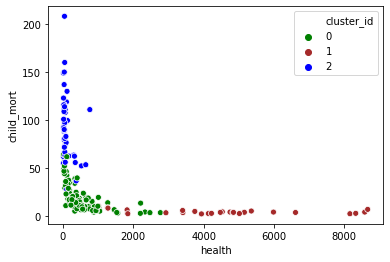

In [369]:
# scatterplot for child_mort, health and cluster Id
sns.scatterplot(x='health',y='child_mort',hue='cluster_id',legend='full',data=country_data,palette=['green','brown','Blue'])

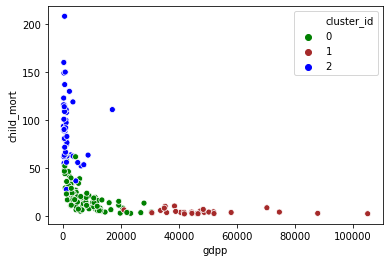

In [370]:
# scatterplot for child_mort, gdpp and cluster Id
sns.scatterplot(x='gdpp',y='child_mort',hue='cluster_id',legend='full',data=country_data,palette=['green','brown','Blue'])

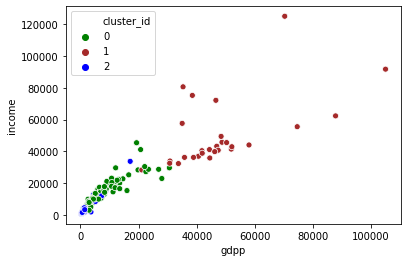

In [368]:
# scatterplot between income, gdpp and cluster ID
sns.scatterplot(x='gdpp',y='income',hue='cluster_id',legend='full',data=country_data,palette=['green','brown','Blue'])

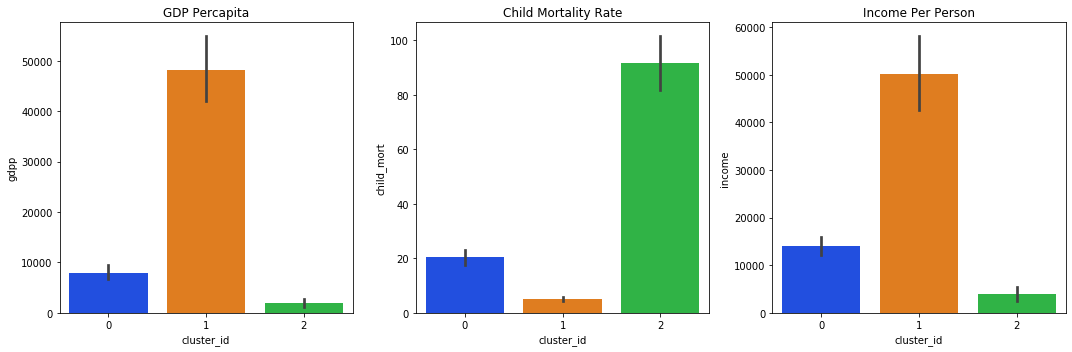

In [373]:
# visualising clusters
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.barplot(x = 'cluster_id', y = 'gdpp', data=country_data, palette="bright")
plt.title('GDP Percapita')

plt.subplot(1,3,2)
sns.barplot(x = 'cluster_id', y = 'child_mort', data=country_data, palette="bright")
plt.title('Child Mortality Rate')

plt.subplot(1,3,3)
sns.barplot(x = 'cluster_id', y = 'income', data=country_data, palette="bright")
plt.title('Income Per Person')

plt.tight_layout()

plt.show()

Cluster 0: Developing
 Cluster 1: Developed
  Cluster 2: Undeveloped

## Hence on the basis of K-mean the country which are direst need of aid are:


In [374]:
country_aid=country_data[country_data['cluster_id']==2]
country_aid.sort_values(['gdpp','income','child_mort','health','inflation','life_expec','total_fer','imports','exports'], 
                      ascending=[True,True,False,True,False,True,False,False,True]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231,2
88,Liberia,89.3,62.4570,38.5860,302.802,700,5.47,60.8,5.02,327,2
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334,2
112,Niger,123.0,77.2560,17.9568,170.868,814,2.55,58.8,7.49,348,2
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.20,55.0,5.20,399,2
93,Madagascar,62.2,103.2500,15.5701,177.590,1390,8.79,60.8,4.60,413,2
106,Mozambique,101.0,131.9850,21.8299,193.578,918,7.64,54.5,5.56,419,2
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.01,47.5,5.21,446,2
94,Malawi,90.5,104.6520,30.2481,160.191,1030,12.10,53.1,5.31,459,2
50,Eritrea,55.2,23.0878,12.8212,112.306,1420,11.60,61.7,4.61,482,2


## Hierarchical Clustering

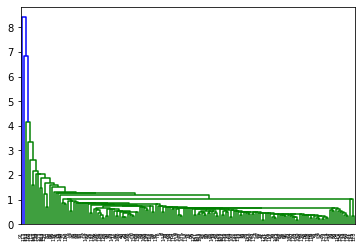

In [371]:
# single linkage
mergings = linkage(data_df, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

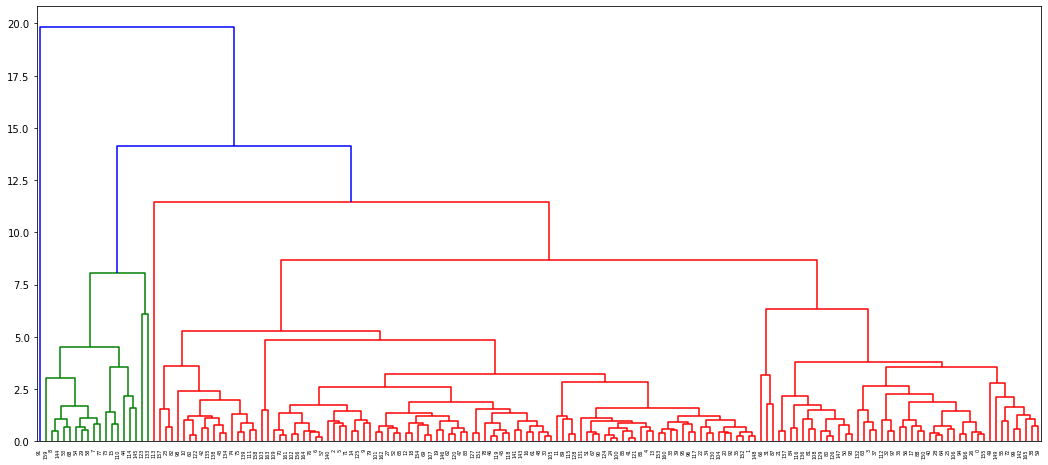

In [388]:
# complete linkage
plt.figure(figsize = (18,8))
mergings = linkage(data_df, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [389]:
# cut the dendrogram such that n_clusters = 3

cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [390]:
# assign cluster labels
country_data['cluster_labels'] = cluster_labels
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,2,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,2,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0,0


In [391]:
country_data['cluster_labels'].value_counts()

0    148
1     18
2      1
Name: cluster_labels, dtype: int64

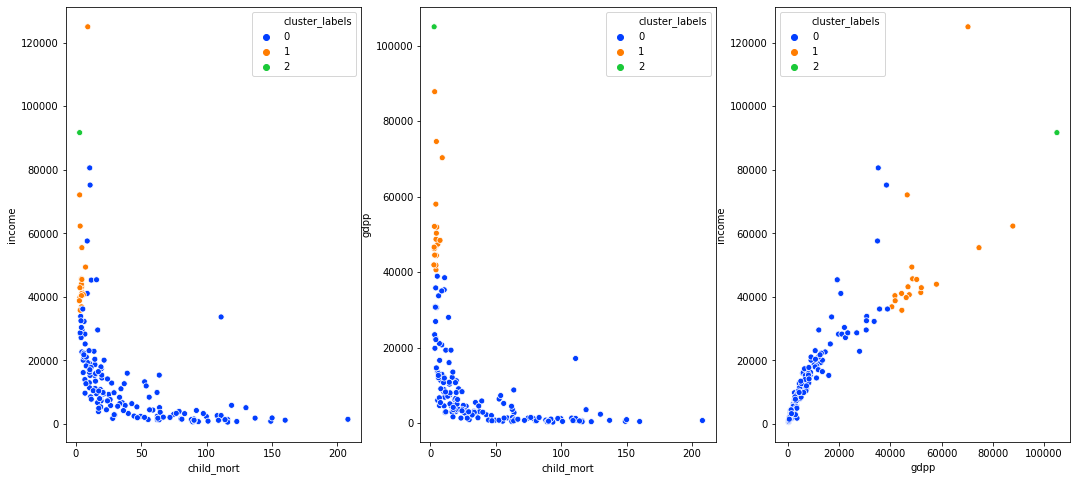

In [401]:
fig, axes = plt.subplots(1,3, figsize=(18,8))
plt.subplot(1,3,1)
sns.scatterplot(x='child_mort', y='income', hue='cluster_labels',data=country_data, palette='bright')

plt.subplot(1,3,2)
sns.scatterplot(x='child_mort', y='gdpp', hue='cluster_labels',data=country_data, palette='bright')

plt.subplot(1,3,3)
sns.scatterplot(x='gdpp', y='income', hue='cluster_labels',data=country_data,palette='bright')

plt.show()

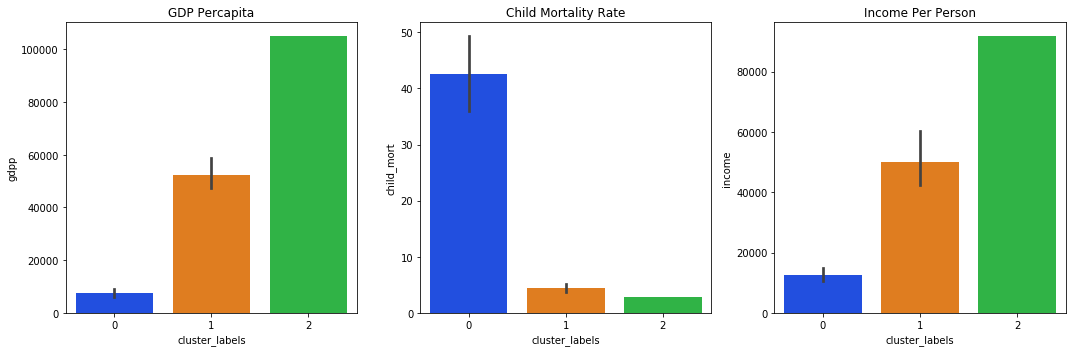

In [402]:
# visualising clusters
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.barplot(x = 'cluster_labels', y = 'gdpp', data=country_data, palette="bright")
plt.title('GDP Percapita')

plt.subplot(1,3,2)
sns.barplot(x = 'cluster_labels', y = 'child_mort', data=country_data, palette="bright")
plt.title('Child Mortality Rate')

plt.subplot(1,3,3)
sns.barplot(x = 'cluster_labels', y = 'income', data=country_data, palette="bright")
plt.title('Income Per Person')

plt.tight_layout()

plt.show()

In [406]:
### hence countries under cluster 0 are in need of aid

country_data[country_data['cluster_labels'] == 0].head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,2,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,2,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0,0


In [407]:
aid_df=country_data[country_data['cluster_labels'] == 0].sort_values(by = ['child_mort','income', 'gdpp'], ascending = [False,True, True])
aid_df.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
66,Haiti,208.0,101.286,45.7442,428.314,1500,5.45,32.1,3.33,662,2,0
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220,17.20,55.0,5.20,399,2,0
32,Chad,150.0,330.096,40.6341,390.195,1930,6.39,56.5,6.59,897,2,0
31,Central African Republic,149.0,52.628,17.7508,118.190,888,2.01,47.5,5.21,446,2,0
97,Mali,137.0,161.424,35.2584,248.508,1870,4.37,59.5,6.55,708,2,0
113,Nigeria,130.0,589.490,118.1310,405.420,5150,104.00,60.5,5.84,2330,2,0
112,Niger,123.0,77.256,17.9568,170.868,814,2.55,58.8,7.49,348,2,0
3,Angola,119.0,2199.190,100.6050,1514.370,5900,22.40,60.1,6.16,3530,2,0
37,"Congo, Dem. Rep.",116.0,137.274,26.4194,165.664,609,20.80,57.5,6.54,334,2,0
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430,6.81,57.9,5.87,575,2,0


### Hence from the above data , KMean is better cluseted in the term of distribution of countries.

## Now choosing countries based on socio economic and health factors


In [411]:
country_aid.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.0
mean,91.610417,879.063521,114.821765,827.028771,3897.354167,11.911146,59.239583,4.992083,1909.208333,2.0
std,34.319855,2252.474004,165.518331,1540.981910,5590.168621,15.362485,6.384914,1.036192,2925.911009,0.0
min,28.100000,20.605200,12.821200,90.552000,609.000000,0.885000,32.100000,2.590000,231.000000,2.0
25%,63.675000,102.873750,34.005875,193.319500,1390.000000,4.080000,56.725000,4.475000,551.500000,2.0
50%,89.750000,196.260000,51.613500,339.306000,1860.000000,8.855000,59.800000,5.055000,932.000000,2.0
75%,111.000000,552.522500,95.303250,801.000000,3522.500000,16.600000,62.825000,5.597500,1465.000000,2.0
max,208.000000,14671.800000,766.080000,10071.900000,33700.000000,104.000000,71.100000,7.490000,17100.000000,2.0


In [416]:
#Mean value of child mortality is 91.61

df_final = country_aid[country_aid['child_mort']>91]
df_final.shape

(21, 12)

In [418]:
df_final.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.0,21.0
mean,121.704762,1010.792248,83.584857,850.461429,3639.190476,14.191667,56.547619,5.431905,1708.190476,2.0,0.0
std,27.164489,3164.988809,159.534694,2143.001506,7039.657972,21.894914,7.401798,1.042999,3607.677295,0.0,0.0
min,92.100000,20.605200,17.750800,90.552000,609.000000,0.885000,32.100000,3.300000,231.000000,2.0,0.0
25%,108.000000,101.286000,26.796000,170.868000,1190.000000,4.150000,55.600000,5.110000,446.000000,2.0,0.0
50%,114.000000,161.424000,40.634100,279.936000,1820.000000,6.810000,57.700000,5.340000,708.000000,2.0,0.0
75%,130.000000,460.980000,64.660000,428.314000,2690.000000,17.200000,60.100000,6.160000,1200.000000,2.0,0.0
max,208.000000,14671.800000,766.080000,10071.900000,33700.000000,104.000000,68.200000,7.490000,17100.000000,2.0,0.0


In [417]:
# Mean value of income is 3639

df_final_1 = df_final[df_final['income']<3639]
df_final_1.shape

(17, 12)

In [419]:
df_final_1.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_labels
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.0,17.0
mean,123.747059,213.279835,43.975647,333.308235,1611.352941,7.989706,55.335294,5.471176,698.352941,2.0,0.0
std,29.176320,187.106274,26.677977,274.763937,781.538942,6.497282,7.693174,1.074778,345.567638,0.0,0.0
min,93.600000,20.605200,17.750800,90.552000,609.000000,0.885000,32.100000,3.300000,231.000000,2.0,0.0
25%,108.000000,81.503000,26.796000,170.200000,918.000000,2.970000,55.000000,5.110000,419.000000,2.0,0.0
50%,114.000000,137.274000,38.755000,248.508000,1430.000000,5.450000,57.300000,5.340000,648.000000,2.0,0.0
75%,137.000000,290.820000,52.269000,390.195000,1930.000000,12.300000,58.000000,6.260000,897.000000,2.0,0.0
max,208.000000,617.320000,129.870000,1181.700000,3320.000000,20.800000,68.200000,7.490000,1310.000000,2.0,0.0


In [420]:
# Now Mean value of GDP is 698.

df_final_2 = df_final_1[df_final_1['gdpp']<698]
df_final_2.shape

(10, 12)

###  Hence countries which are in need of the aid based on socio-economic factors.

In [427]:
df_final_2=df_final_2[df_final_2['cluster_labels'] == 0].sort_values(by = ['child_mort','income', 'gdpp'], ascending = [False,True, True])
df_final_2=df_final_2.drop(['cluster_id','cluster_labels'],axis=1)
df_final_2.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
66,Haiti,208.0,101.2860,45.7442,428.314,1500,5.45,32.1,3.33,662
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.20,55.0,5.20,399
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.01,47.5,5.21,446
112,Niger,123.0,77.2560,17.9568,170.868,814,2.55,58.8,7.49,348
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430,6.81,57.9,5.87,575
64,Guinea-Bissau,114.0,81.5030,46.4950,192.544,1390,2.97,55.6,5.05,547
63,Guinea,109.0,196.3440,31.9464,279.936,1190,16.10,58.0,5.34,648
106,Mozambique,101.0,131.9850,21.8299,193.578,918,7.64,54.5,5.56,419
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231


## Recommendations From the analysis performed,
### As low income people have high child mortality, so CEO must focus more on low income countries
###  Countries with Low GDP per capita countries are not having much import and export of goods and services also must be focused
### focus more on Burundi, Congo, Dem. Rep where the total health spending is too less.
### Haiti is the country having very low life expectancy, and high child mortality. 